In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [4]:
data3 = pd.read_csv("EBAY (1).csv")
data4 = pd.read_csv("EBAY.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [5]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,25.610001,26.740000,24.76,26.430000,25.747961,57182600
1,2016-01-25,26.400000,27.070000,22.40,23.459999,22.854601,122576100
2,2016-02-01,23.340000,24.230000,22.91,23.200001,22.601313,90517100
3,2016-02-08,22.860001,23.000000,21.52,22.490000,21.909634,79108700
4,2016-02-15,22.299999,23.860001,22.23,23.809999,23.195572,42180300


In [6]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,44.945795,42.307368,47.563050
433,2020-08-25,45.031491,42.388175,47.517685
434,2020-08-26,45.113497,42.389484,47.694734
435,2020-08-27,45.190770,42.615048,47.892193
436,2020-08-28,45.262439,42.613048,47.635747


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

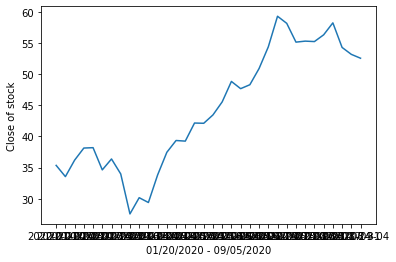

In [8]:
import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')

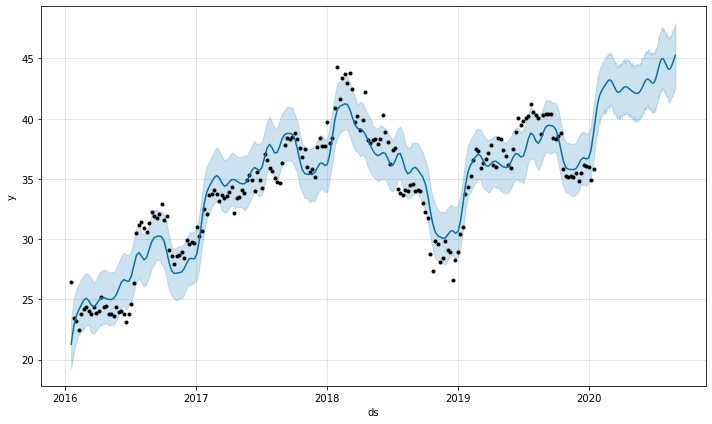

In [9]:
fig1 = m4.plot(forecast)

In [10]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,55.220001,57.599998,53.700001,56.290001,56.124046,37030600
30,2020-08-17,56.689999,59.060001,56.299999,58.209999,58.038383,30948200
31,2020-08-24,58.459999,58.959999,54.049999,54.270000,54.110001,38093500
32,2020-08-31,54.000000,55.419998,52.590000,53.160000,53.003273,44592100
33,2020-09-04,52.820000,53.330002,50.950001,52.540001,52.540001,9971559


In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,43.842141,42.307368,47.563050,42.302190,45.263355,1.103655,1.103655,1.103655,1.103655,1.103655,1.103655,0.0,0.0,0.0,44.945795
433,2020-08-25,43.859011,42.388175,47.517685,42.308511,45.283789,1.172479,1.172479,1.172479,1.172479,1.172479,1.172479,0.0,0.0,0.0,45.031491
434,2020-08-26,43.875882,42.389484,47.694734,42.314832,45.311924,1.237615,1.237615,1.237615,1.237615,1.237615,1.237615,0.0,0.0,0.0,45.113497
435,2020-08-27,43.892753,42.615048,47.892193,42.322193,45.339614,1.298017,1.298017,1.298017,1.298017,1.298017,1.298017,0.0,0.0,0.0,45.190770
436,2020-08-28,43.909624,42.613048,47.635747,42.331536,45.370510,1.352815,1.352815,1.352815,1.352815,1.352815,1.352815,0.0,0.0,0.0,45.262439


In [1]:
ebay_impact = (52.540001 - 45.262439)/45.262439 * 100
print("Ebay's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", ebay_impact, "% as of 09/05/2020")

Ebay's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 16.078590020303583 % as of 09/05/2020
